# Project for Modelling Topics and Clustering of Documents

## Background
*Topic modeling* is a generic term for assigning each document to one or more topics (usually unsupervised). Each of the components identified then forms a topic, and the coefficients of the components in the representation of a document indicate how strongly that document belongs to a particular topic. When talking about topic modeling, it usually refers to *Latent Dirichlet Allocation* (LDA for short).

### Latent Dirichlet Allocation  (LDA)
The LDA model attempts to find groups of words (topics) that frequently occur together. LDA also assumes that each document can be understood as a “mixture” of a subset of all topics. For a machine learning model a “topic” corresponds to the components determined by a principal component analysis. These topics may have meaning, but they do not have to.
- `LatentDirichletAllocation` [info](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html?highlight=lda)
- `Scikit-Learn` [LDA](https://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation).
  
Here, we are using the Stanford Movie Critiques Dataset

## Imports

In [1]:
import pandas as pd
import numpy as np
import re
import wget
import tarfile
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import load_files

Removing words that are contained in at least 15% of the documents and limiting the Bag-of-Word-Model to the remaining most common 10000 words.

In [2]:
# Download data
url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
filename = wget.download(url)

In [3]:
# Unzip data
tar = tarfile.open("aclImdb_v1.tar.gz")
tar.extractall()
tar.close()

In [4]:
# Load data
reviews_train = load_files("aclImdb/train/")
reviews_test = load_files("aclImdb/test/")

## Descriptive Statistics

In [5]:
# load_files provides a bunch object containing test and categories (test)
text_train, y_train = reviews_train.data, reviews_train.target
print("Type of text_train: {}".format(type(text_train)))
print("Length of text_train: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

Type of text_train: <class 'list'>
Length of text_train: 75000
text_train[6]:
b'Gloomy Sunday - Ein Lied von Liebe und Tod directed by Rolf Sch\xc3\xbcbel in 1999 is a romantic, absorbing, beautiful, and heartbreaking movie. It started like Jules and Jim; it ended as one of Agatha Christie\'s books, and in between it said something about love, friendship, devotion, jealousy, war, Holocaust, dignity, and betrayal, and it did better than The Black Book which is much more popular. It is not perfect, and it made me, a cynic, wonder in the end on the complexity of the relationships and sensational revelations, and who is who to whom but the movie simply overwhelmed me. Perfect or not, it is unforgettable. All four actors as the parts of the tragic not even a triangle but a rectangle were terrific. I do believe that three men could fell deeply for one girl as beautiful and dignified as Ilona in a star-making performance by young Hungarian actress Erica Marozs\xc3\xa1n and who would not? The 

In [6]:
# load_files provides a bunch object containing test and categories (train)
text_test, y_test = reviews_test.data, reviews_test.target
print("Type of text_test: {}".format(type(text_test)))
print("Length of text_test: {}".format(len(text_test)))
print("text_test[6]:\n{}".format(text_test[6]))

Type of text_test: <class 'list'>
Length of text_test: 25000
text_test[6]:
b"I think this is one hell of a movie...........We can see Steven fighting around with his martial art stuff again and like in all Segal movies there's a message in it, without the message it would be one of many action/fighting movies but the message is what makes segal movies great and special."


In [7]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [8]:
print("text_train[6]:\n{}".format(text_train[6]))

text_train[6]:
b'Gloomy Sunday - Ein Lied von Liebe und Tod directed by Rolf Sch\xc3\xbcbel in 1999 is a romantic, absorbing, beautiful, and heartbreaking movie. It started like Jules and Jim; it ended as one of Agatha Christie\'s books, and in between it said something about love, friendship, devotion, jealousy, war, Holocaust, dignity, and betrayal, and it did better than The Black Book which is much more popular. It is not perfect, and it made me, a cynic, wonder in the end on the complexity of the relationships and sensational revelations, and who is who to whom but the movie simply overwhelmed me. Perfect or not, it is unforgettable. All four actors as the parts of the tragic not even a triangle but a rectangle were terrific. I do believe that three men could fell deeply for one girl as beautiful and dignified as Ilona in a star-making performance by young Hungarian actress Erica Marozs\xc3\xa1n and who would not? The titular song is haunting, sad, and beautiful, and no doubt dese

In [9]:
np.unique(y_train)

# y_train contains 3 categories

array([0, 1, 2])

In [10]:
pd.value_counts(y_train)

2    50000
1    12500
0    12500
Name: count, dtype: int64

In [11]:
y_train[:10]

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 0])

In [12]:
pprint(text_train[8], width=80, indent=4)

# 2 = Mixed reviews, 1 = positive reviews, 0 = negative reviews

(b'Why was this movie made? No doubt to sucker in the family-rebelling MTV fait'
 b'hful, many of whom do not care about anything other than the exterior of a m'
 b'ovie - in Go the story about drugs and sex, and the crude humor. While the p'
 b'lot line of the movie is interesting, the unsympathetic and underdeveloped c'
 b'haracters give us nothing to care about.  What is most bothersome is that at'
 b' the end of the movie nobody learns anything. This movie would have been muc'
 b'h better if it had a point. It makes brief and ambivalent references to fami'
 b'ly life, but never really has the guts to develop its critiques.  I guess wh'
 b'at makes this movie so pathetic is that every character is like all the othe'
 b"r characters. What's worse, never in the film, not even at the climax, do an"
 b'y characters distinguish themselves. The four men in Vegas hardly differ at '
 b'all, and the three convenience store workers are all the same. If you want t'
 b'o waste your 7 bucks on u

In [13]:
len(text_train)

75000

In [14]:
np.unique(y_test)

array([0, 1])

In [15]:
pd.value_counts(y_test)

# y_test only contains 2 categories

1    12500
0    12500
Name: count, dtype: int64

## Feature Engineering

In [16]:
#Bag of Worts including removal of stop words (english) and word contained in > 15% of the documents. 
vec = CountVectorizer(stop_words='english', max_df=0.15, max_features=10000)

# Training vocabulary from the train data and transforming data
X_train_vec = vec.fit_transform(text_train)

print("Size of Vocabulary: {}".format(len(vec.vocabulary_)))
print("\nbag_of_words: {}".format(repr(X_train_vec)))

Size of Vocabulary: 10000

bag_of_words: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5172958 stored elements and shape (75000, 10000)>


## Training the Model

In [ ]:
# Training a LDA-model with 10 topics (just enough to got through it later). Using batch, because it usually leads to better results, even if it takes longer.
lda = LatentDirichletAllocation(n_components=10, random_state=0, max_iter=20, learning_method='batch') # n_topics was changed to n_components!!! 

X_train_lda = lda.fit(X_train_vec, y_train)

In [ ]:
# Applying model to test data
X_test_vec = vec.transform(text_test)

print("\nbag_of_words: {}".format(repr(X_test_vec)))

X_test_lda = lda.transform(X_test_vec)


bag_of_words: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1671962 stored elements and shape (25000, 10000)>


### Assessment


In [ ]:
print(X_train_lda.components_.shape)

#The LDA identified 10 topics with 10000 words

(10, 10000)


Now we are assessing the 10 most important words for each topic, to get a better understanding of the topics


In [ ]:
#A new Function is defined to print the topics with the most important words

def print_topics(model, vectorizer, n_top_words):
    """Pulls the ten most important words for each topic from the LDA model and prints them."""
    feature_names = vectorizer.get_feature_names_out()
    
    for topic_idx, topic in enumerate(model.components_):
        message = f"Thema #{topic_idx}: "
        # Sorts words by importance and pics the n_top_words
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        message += ", ".join(top_features)
        print(message)

# Calling the function
print_topics(lda, vec, 10)


Thema #0: police, murder, crime, john, killer, cop, car, gets, plays, town
Thema #1: horror, effects, budget, pretty, dead, gore, special, look, blood, low
Thema #2: director, interesting, actors, work, script, doesn, point, audience, fact, book
Thema #3: girl, family, woman, mother, young, father, wife, old, son, boy
Thema #4: funny, didn, comedy, got, want, thought, 10, saw, worst, actually
Thema #5: role, cast, performance, john, play, comedy, actor, plays, played, screen
Thema #6: war, world, american, men, military, years, earth, army, government, ship
Thema #7: world, human, young, real, director, american, music, beautiful, work, true
Thema #8: action, 10, fun, game, excellent, lot, actors, quite, cast, music
Thema #9: series, original, episode, tv, dvd, years, new, version, episodes, animation


## Training a Second Model

Next a new model is trained with 100 topics. More topics make the analysis harder, but the probability of the topics being more specialized is higher.

In [ ]:
# Training the second model
lda100 = LatentDirichletAllocation(n_components=100, random_state=0, max_iter=20, learning_method='batch') # n_topics was changed to n_components!!!

X_train_lda100 = lda100.fit(X_train_vec)
train_lda100 = lda100.transform(X_train_vec)

### Assessment

Next, the topics are being observed and we will look at the 20 most important words of the top100 topics.

In [27]:
print_topics(lda100, vec, 20)

Thema #0: police, crime, cop, gang, gangster, criminal, law, boss, cops, drug, mob, city, criminals, murder, plays, partner, mafia, violence, action, violent
Thema #1: minutes, didn, going, got, dvd, video, money, rent, want, thought, half, hour, saw, ll, watched, couldn, actually, went, maybe, worth
Thema #2: doesn, point, minutes, boring, completely, half, interesting, simply, script, director, audience, sense, instead, long, main, dull, supposed, problem, dialogue, fact
Thema #3: gay, men, ford, ryan, maria, lesbian, straight, homosexual, harrison, aids, marc, bourne, male, homosexuality, april, lover, drag, sex, sexual, troy
Thema #4: worst, awful, terrible, stupid, waste, horrible, crap, worse, script, actually, money, actors, 10, piece, believe, absolutely, want, avoid, ridiculous, poor
Thema #5: george, fox, steven, warner, studio, bogart, hollywood, seagal, barbara, noir, classic, ted, reed, contract, 1940, double, 1950, fuller, bros, humphrey
Thema #6: jim, brian, shakespeare,

In [ ]:
def print_topics2(model, vectorizer, n_top_words, topic_num):
    """Pulls the x most important words for a specific topic from the LDA model and prints them."""
    # Pulls the word from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    for topic_idx, topic in enumerate(model.components_):
        message = f"Thema #{topic_idx}: "
        # Sorts words by importance and pics the n_top_words
    
    # Pulls only the selected topic
    topic = model.components_[topic_num]
    
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    
    print(f"Thema #{topic_num}: {', '.join(top_features)}")

# Calling the function
print("Crime Thema:")
print(print_topics2(lda100, vec, 20, 0))
print("\nLGBTQ+ Thema:")
print(print_topics2(lda100, vec, 20, 3))
print("\nMusik Thema:")
print(print_topics2(lda100, vec, 20, 7))
print("\nKriegs Thema:")
print(print_topics2(lda100, vec, 20, 38))
print("\nComedy Thema:")
print(print_topics2(lda100, vec, 20, 45))


Crime Thema:
Thema #0: police, crime, cop, gang, gangster, criminal, law, boss, cops, drug, mob, city, criminals, murder, plays, partner, mafia, violence, action, violent
None

LGBTQ+ Thema:
Thema #3: gay, men, ford, ryan, maria, lesbian, straight, homosexual, harrison, aids, marc, bourne, male, homosexuality, april, lover, drag, sex, sexual, troy
None

Musik Thema:
Thema #7: musical, numbers, stage, songs, singing, fred, number, dance, song, broadway, rogers, albert, musicals, victoria, dancing, astaire, sing, sings, production, singer
None

Kriegs Thema:
Thema #38: war, american, world, soldiers, army, history, battle, british, men, military, soldier, country, vietnam, america, years, wwii, general, political, civil, ii
None

Comedy Thema:
Thema #45: funny, comedy, humor, laugh, jokes, hilarious, laughs, fun, comedies, moments, humour, laughing, romantic, comic, joke, adam, comedic, funniest, isn, laughed
None


**Aufgabe A.7: Sortiere das "Musikthema" 45 nach "Gewicht". Gib die zehn Dokumente aus, in denen das Thema am stärksten ausgeprägt ist. Zeige für diese Dokumente jeweils die ersten zwei Sätze.** 

In [ ]:
# Music topic #7

def get_sorted_topic(model, vectorizer, topic_num, n_top_words=20):
    feature_names = vectorizer.get_feature_names_out()
    # Weight of a specific topic
    topic_weights = model.components_[topic_num]

    # Index of words are being sorted by weight (descending)
    sorted_indices = topic_weights.argsort()[::-1][:n_top_words]

    # Generates a list from word and weight
    sorted_topic_data = [(feature_names[i], topic_weights[i]) for i in sorted_indices]
    
    # Returns DataFrame
    return pd.DataFrame(sorted_topic_data, columns=['Wort', 'Gewicht'])

get_sorted_topic(lda100, vec, topic_num=7)


,Wort,Gewicht
0,musical,1916.651564
1,numbers,967.529274
2,stage,920.768130
3,songs,650.153628
4,singing,563.127924
5,fred,536.446381
6,number,533.861777
7,dance,523.496795
8,song,508.842122
9,broadway,501.978462


In [ ]:
def show_top_docs_for_topic(topic_num, lda_matrix, original_texts, n_docs=10):
    """
    Docstring for show_top_docs_for_topic
    
    :param topic_num: Description
    :param lda_matrix: Description
    :param original_texts: Description
    :param n_docs: Description
    """
    # Extracts column for specific topic
    topic_column = lda_matrix[:, topic_num]
    
    # Finds the indexes of the documents with the highest values in this column
    top_doc_indices = np.argsort(topic_column)[::-1][:n_docs]
    
    print(f"--- Top {n_docs} documents for topic #{topic_num} ---\n")
    
    for i, idx in enumerate(top_doc_indices):
        score = topic_column[idx]
        text = original_texts[idx]
        
        # If texts are in bytes, they will be decoded here
        if isinstance(text, bytes):
            text = text.decode('utf-8')
            
        # Extracts the first two sentences
        # Searches for sentence endings (. ! ?) followed by whitespace
        sentences = re.split(r'(?<=[.!?])\s+', text)
        preview = " ".join(sentences[:2])
        
        print(f"Rang {i+1} (Score: {score:.4f} | Index: {idx}):")
        print(f"{preview}...")
        print("-" * 30)

show_top_docs_for_topic(7, train_lda100, text_train)


--- Top 10 Dokumente für Thema #7 ---

Rang 1 (Score: 0.9764 | Index: 9437):
Another fun, witty, frothy RKO musical with Astaire and Rogers, FOLLOW THE FLEET is a charming film. While it lacks the stand-out great tunes of SWNG TIME (although the final number "Face the music and dance" is one of the team's best and rightfully so), it is hugely enjoyable, as these two could virtually do no wrong together in the 1930's....
------------------------------
Rang 2 (Score: 0.9505 | Index: 63808):
If you like Fred Astaire and Ginger Rogers you must see this movie if only for the "Smoke Gets In Your Eyes" dance sequence...in a word...glorious. A platinum blonde Lucille Ball is one of the models in a fashion show that features stunning gowns and furs of the era....
------------------------------
Rang 3 (Score: 0.9340 | Index: 14584):
Of course, the story line for this movie isn't the best, but the dances are wonderful. This story line is different from other Astaire-Rogers movies in that neither 

**Aufgabe A.8: Um eine andere interessante Perspektive zu erhalten, inspiziere bitte, wie viel Gewicht jedes Thema insgesamt erhält, indem du `document_topics` über alle Bewertungen aufsummieren. Benenne jedes Thema nach den zwei häufigsten Wörtern. Zeige die erlernten Gewichte in einer Abbildung.**

In [ ]:
# Sum of weights per topic over all documents
topic_weights = np.sum(train_lda100, axis=0)

# Sorts topics by weight
feature_names = vec.get_feature_names_out()
topic_names = []

for topic in lda100.components_:
    # Indices of the 2 most frequent words
    top_indices = topic.argsort()[:-3:-1]
    name = " + ".join([feature_names[i] for i in top_indices])
    topic_names.append(name)


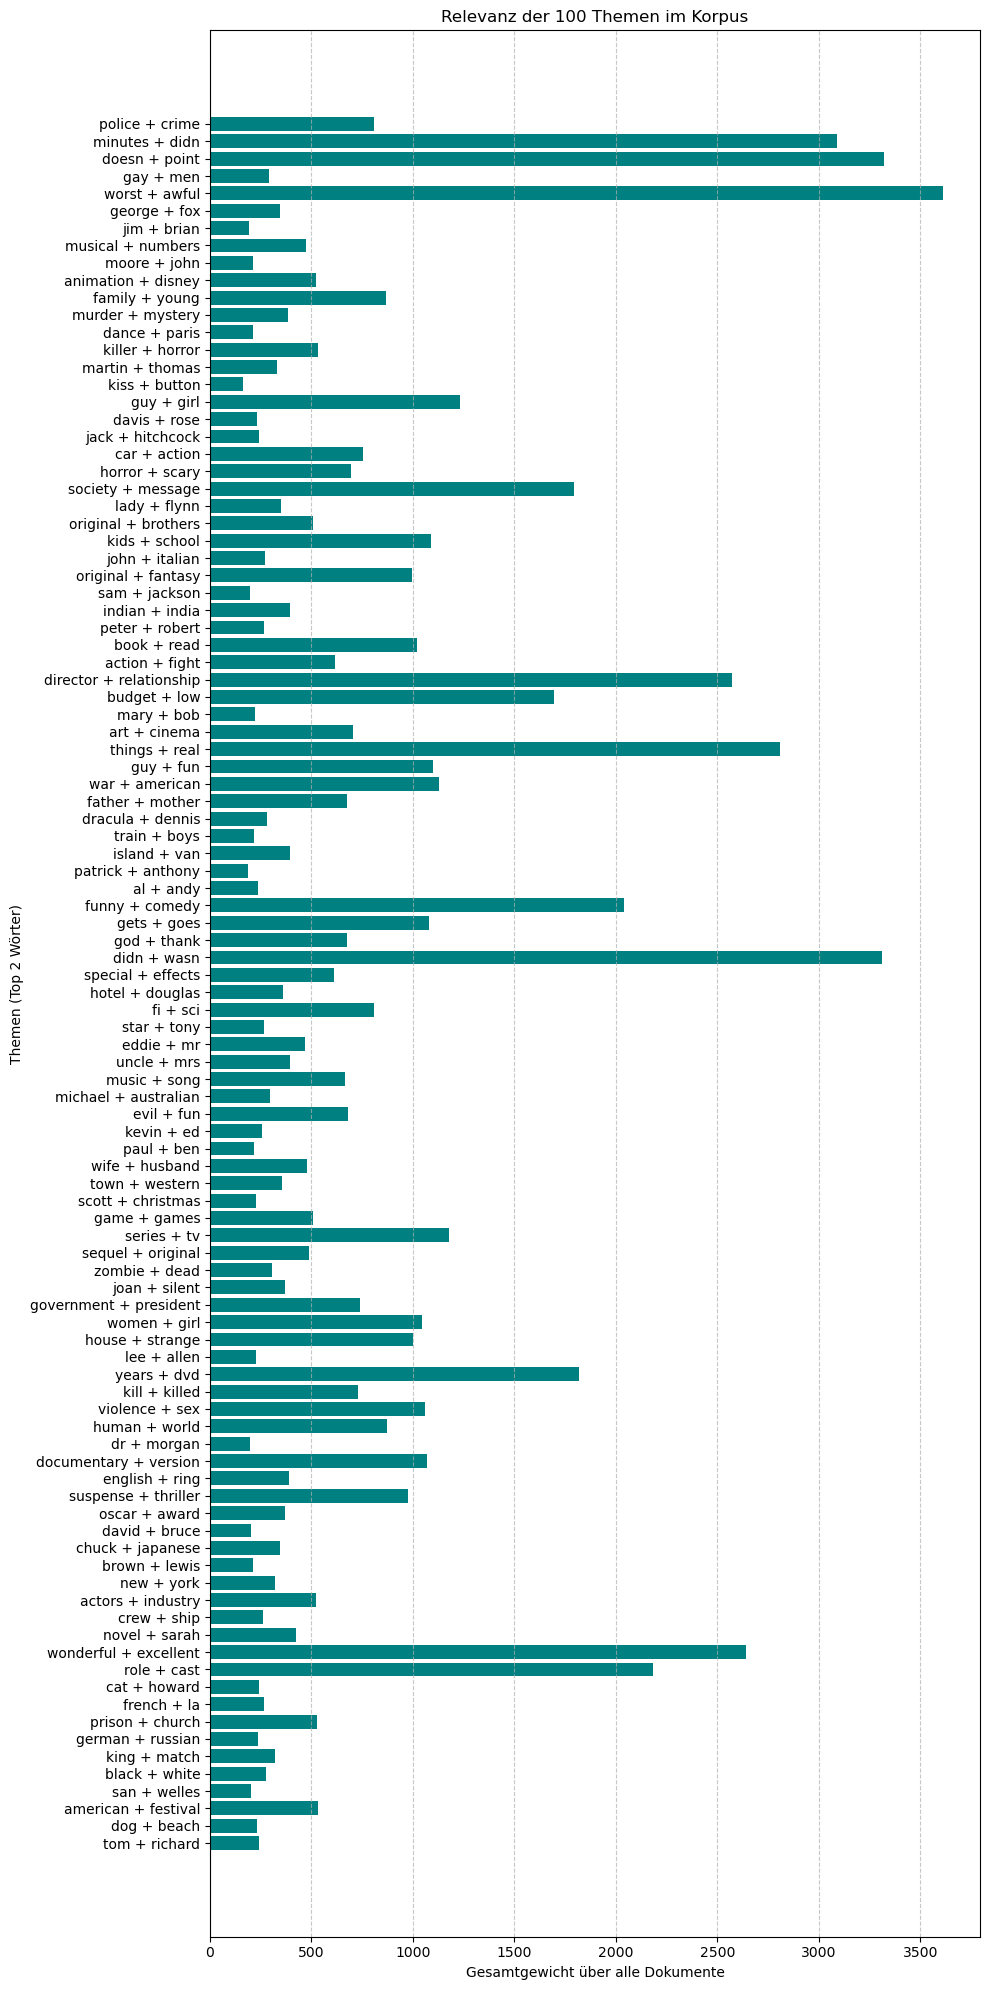

In [ ]:
# Generate a Figure with sufficient height for 100 rows
plt.figure(figsize=(10, 20)) 

# Horizontal Plot: Names on the Y-axis, weights on the X-axis
plt.barh(topic_names, topic_weights, color='teal')

plt.xlabel('Total weight over all documents')
plt.ylabel('Topics (Top 2 words)')
plt.title('Relevance of the 100 topics in the corpus')

# Inversion of the Y-axis, so that topic 0 is at the top
plt.gca().invert_yaxis() 

# Grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
